In [2]:
from netCDF4 import Dataset
import numpy as np

In [3]:
ds = Dataset("/Users/huziy/Downloads/model24_2011070100.nc")

In [4]:
ds.variables.keys()

[u'lat', u'lon', u'APCP_24']

In [5]:
pcp = ds.variables["APCP_24"][:]

In [6]:
pcp.shape

(163, 163)

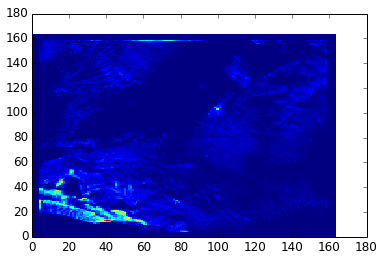

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.pcolormesh(pcp.transpose())


In [8]:
ds.Projection #<- This is how I figured out the projection type

u'Mercator'

In [9]:
from mpl_toolkits.basemap import Basemap

In [10]:
lons, lats = ds.variables["lon"][:], ds.variables["lat"][:]

In [16]:
b = Basemap(projection="merc", llcrnrlon=lons[0, 0], llcrnrlat=lats[0,0], urcrnrlon=lons[-1, -1], urcrnrlat=lats[-1, -1])

In [17]:
x, y = b(lons, lats)
print lons.shape, y.shape, pcp.shape


(163, 163) (163, 163) (163, 163)


<matplotlib.colorbar.Colorbar instance at 0x1069ba4d0>

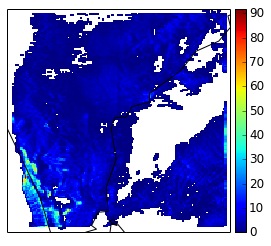

In [24]:
#mask very small values (for plotting only, nothing is masked in calculations)
to_plot = np.ma.masked_where(pcp < 1.0e-5, pcp)

im = b.pcolormesh(x, y, to_plot)
b.drawcoastlines()
b.colorbar(im)

In [25]:
pcp.mean() #<- Simple mean

2.7936828

In [26]:
#area mean (~approx)
dx = x[1:, 1:] - x[:-1, :-1]
dy = y[1:, 1:] - y[:-1, :-1]

area = np.zeros_like(x)
area[:-1, :-1] = dx * dy
area[-1, :] = area[-2, :]
area[:, -1] = area[:, -2]

In [27]:
(pcp * area).sum() / area.sum() # <- area averaged

2.7936833